# Notebook to Download Data from Yahoo Finance

In [1]:
import os
import datetime
import glob

import numpy as np
import pandas as pd
import pyfolio as pf
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

from deep_rl_asset_allocation.configs import data_config, paths_config

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# plotting in notebook
%matplotlib inline

### Import Data as a df or CSV

In [4]:
# 01-Jan-2009
START = datetime.date(2009, 1, 1)
# 01-Apr-2022
END = datetime.date(2022, 1, 1)

In [5]:
# WARNING: yf.download will sometimes timeout.

TICKERS = [
            # "^DJI",
            # 1 - 10
            # 'AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GS', 'HD',
            # 11 - 20
            # 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
            # 21 - 30
            # 'PFE', 'PG', 'RTX', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', 'XOM',
            ]

for ticker in TICKERS:
    df = yf.download(ticker, start=START, end=END)
    # print(df.head())

    # save csv
    CSV_FILENAME = os.path.join(paths_config.data_csv_dir, "daily", f"{ticker}.csv")
    df.to_csv(CSV_FILENAME)
    print(f"Saved to: {CSV_FILENAME}")

### Aggreate Stocks into one Dataframe

In [6]:
def aggregate_df_for_tickers(filenames, tickers_to_exclude=["^DJI"], COLS=data_config.COLS):

    # 1st. Init df with our default columns
    df = pd.DataFrame(columns=_test_df.columns)

    # 2nd. Append data with Ticker name for each df
    for filename in filenames:
        # get ticker name
        ticker = filename.split('/')[-1].split(".")[0]
        if ticker not in tickers_to_exclude:
            # print(f'{ticker}')
            _temp_df = pd.read_csv(filename)
            _temp_df["Ticker"] = ticker
            df = df.append(_temp_df)

    # save csv
    df.to_csv(paths_config.AGGREGATE_DJIA_DATA_FILE, index=False)
    print(f"Saved to: {paths_config.AGGREGATE_DJIA_DATA_FILE}")
    
    return df

def aggregate_df_for_adj_close_price(filenames, tickers_to_exclude=["^DJI"]):

    # 1st: Get ticker names as store as column names
    columns = []
    columns.append("Date")
    for filename in filenames:
        ticker = filename.split('/')[-1].split(".")[0]
        if ticker not in tickers_to_exclude:
            columns.append(ticker)

    # 2nd: Init an empty df
    df = pd.DataFrame(columns=columns)

    # 3rd: Input Adj Close Price for each ticker
    for filename in filenames:
        ticker = filename.split('/')[-1].split(".")[0]
        if ticker not in tickers_to_exclude:
            # get adj close price
            _temp_df = pd.read_csv(filename)
            dates = _temp_df["Date"].values
            adj_close = _temp_df["Adj Close"].values
            df["Date"] = dates
            df[ticker] = adj_close

    # save csv
    df.to_csv(paths_config.AGGREGATE_DJIA_ADJ_CLOSE_FILE, index=False)
    print(f"Saved to: {paths_config.AGGREGATE_DJIA_ADJ_CLOSE_FILE}")
    
    return df

In [7]:
CSV_FILENAMES = sorted(glob.glob(os.path.join(paths_config.data_csv_dir, f"daily/*.csv")))
print(f"CSV_FILENAMES: {len(CSV_FILENAMES)}")

CSV_FILENAMES: 31


In [8]:
# check first dataframe
_test_df = pd.read_csv(CSV_FILENAMES[0])
print(_test_df.columns)
_test_df.head()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.775247,746015200
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.892372,1181608400
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.844666,1289310400
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.783197,753048800
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.834880,673500800


In [9]:
aggregate_df_for_tickers(CSV_FILENAMES)

Saved to: /Users/Aidan.Keaveny/git/deep-rl-asset-allocation/deep_rl_asset_allocation/data/csv/DJIA_aggregated.csv


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.775247,746015200,AAPL
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.892372,1181608400,AAPL
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.844666,1289310400,AAPL
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.783197,753048800,AAPL
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.834880,673500800,AAPL
...,...,...,...,...,...,...,...,...
3268,2021-12-27,60.930000,61.950001,60.419998,61.889999,61.211414,12593700,XOM
3269,2021-12-28,61.910000,62.310001,61.400002,61.689999,61.013607,12781000,XOM
3270,2021-12-29,61.480000,61.599998,60.919998,61.150002,60.479530,12733600,XOM
3271,2021-12-30,61.220001,61.599998,60.770000,60.790001,60.123474,11940300,XOM


In [10]:
df = aggregate_df_for_adj_close_price(CSV_FILENAMES)
df

Saved to: /Users/Aidan.Keaveny/git/deep-rl-asset-allocation/deep_rl_asset_allocation/data/csv/DJIA_adj_close.csv


,Date,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
0,2009-01-02,2.775247,15.579445,33.941097,32.318974,12.349073,45.176243,10.519338,20.597496,71.168526,...,10.188951,42.074955,21.427711,32.545395,22.826941,12.174686,17.091934,18.235611,41.895214,49.833103
1,2009-01-05,2.892372,16.079144,34.631172,31.747135,12.458290,45.258904,10.273590,20.235834,72.825500,...,10.127606,41.773472,21.174244,32.062962,22.454628,12.261259,16.026150,19.156321,41.411652,49.827019
2,2009-01-06,2.844666,16.981836,34.736183,31.554237,12.953420,45.666267,10.956217,20.933325,72.768105,...,9.926838,41.652874,21.400415,31.083723,21.925119,13.124698,15.769571,19.063526,41.045303,49.015167
3,2009-01-07,2.783197,16.266466,33.573547,30.086760,12.611200,43.664848,10.976700,19.960287,69.314674,...,9.753955,40.922600,20.870089,29.852474,21.759640,12.839924,15.985281,19.291925,40.693611,47.763832
4,2009-01-08,2.834880,16.290848,33.596058,30.327885,12.771393,43.830162,10.792390,19.719177,70.061134,...,9.843182,40.473701,20.866184,30.406883,22.098864,12.703232,16.230820,19.156321,37.645638,48.276588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3268,2021-12-27,180.100540,163.978439,203.169998,205.383438,63.048477,117.555779,79.461479,152.800003,385.766052,...,58.753292,161.100357,84.768700,155.224823,498.026245,217.276505,52.052856,50.224075,140.217682,61.211414
3269,2021-12-28,179.061859,163.998398,206.130005,205.622269,63.157833,117.328163,80.098686,155.199997,385.338562,...,57.572269,161.965683,85.544388,156.299179,501.456085,217.695831,52.092381,50.917095,142.229904,61.013607
3270,2021-12-29,179.151749,163.419846,203.660004,206.328842,63.585312,116.724495,80.238075,154.869995,383.936859,...,57.145515,163.308441,85.415108,156.677200,504.088287,217.815628,51.736668,51.728916,142.160172,60.479530
3271,2021-12-30,177.973251,163.749023,202.710007,205.084885,63.247307,116.209908,79.780083,155.929993,383.260803,...,57.959328,161.896072,85.325607,155.990799,502.941681,217.516113,51.627975,51.471512,142.618393,60.123474


### Plot Data

In [11]:
# format dates
from deep_rl_asset_allocation.preprocessing.data_preprocessing import convert_datadate_to_datetime
df["Date"] = df.apply(convert_datadate_to_datetime, axis=1)
type(df.Date[0])

datetime.date

No handles with labels found to put in legend.


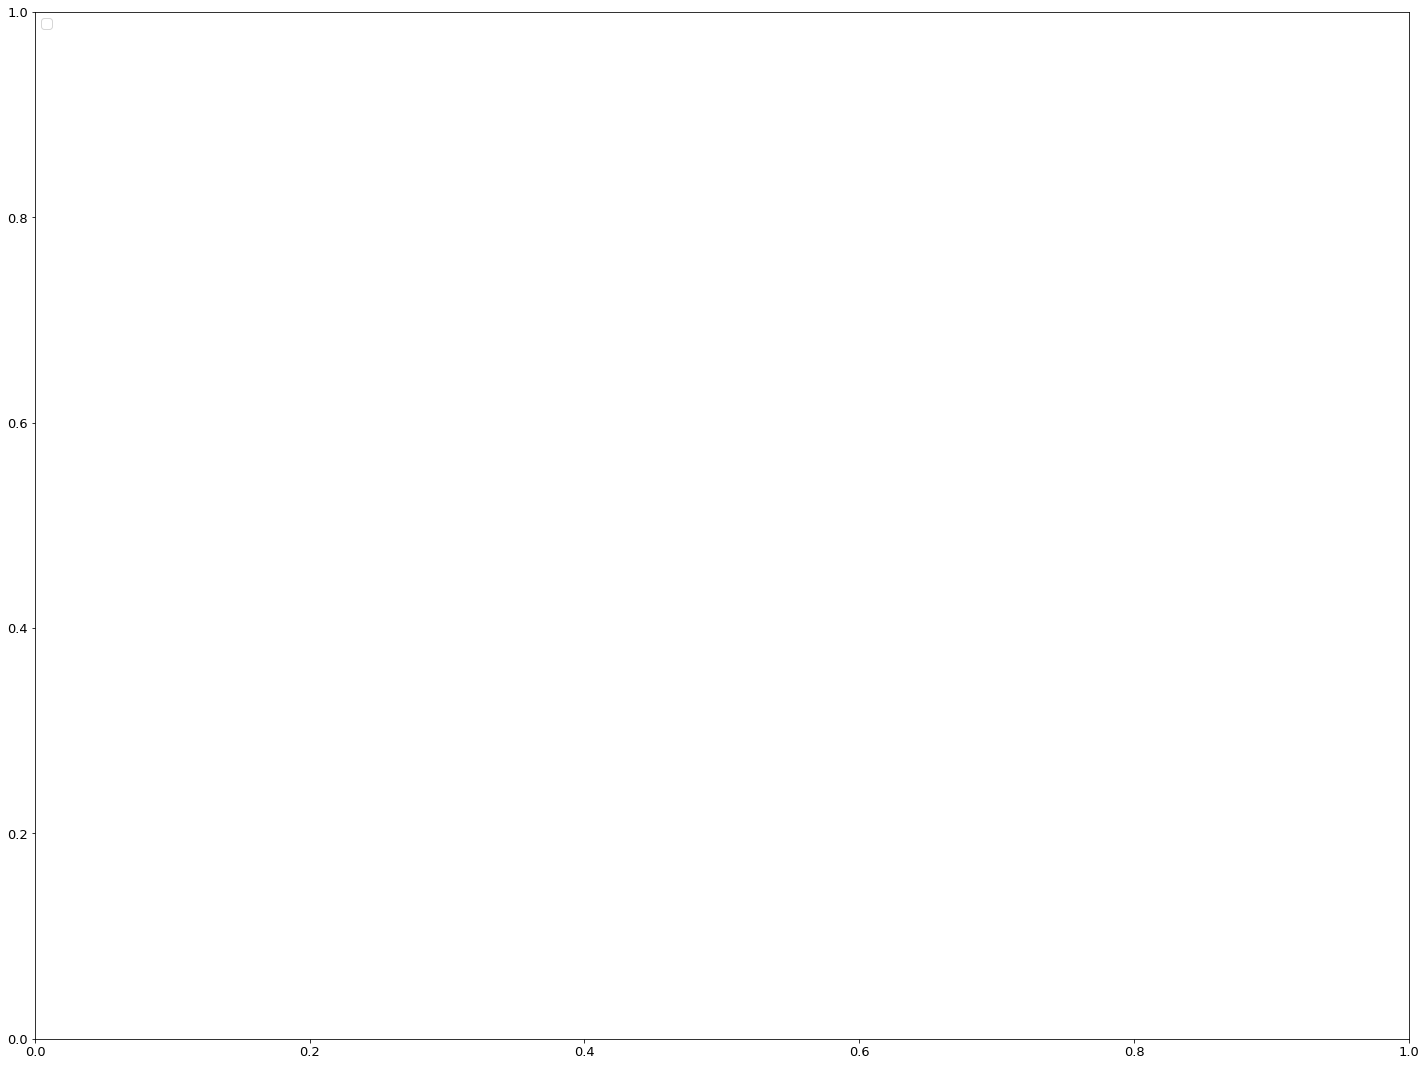

In [12]:
# Plot Portfolio Value
plt.rc('axes', titlesize=18)  # fontsize of the axes title
plt.rc('axes', labelsize=14)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)  # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  # fontsize of the tick labels
plt.rc('legend', fontsize=13)  # legend fontsize
plt.rc('font', size=13)  # controls default text sizes

fig, ax = plt.subplots(figsize=(20, 15), tight_layout=True)
colors = sns.color_palette('pastel')

# for column in df.columns:
#     if column in data_config.TICKERS:
#         ticker = column
#         ax.plot(df["Date"], df[ticker], '-', linewidth=1, label=ticker)

plt.legend(loc='upper left')

### Look at Correlation
WARNING: This is calculated over the entire time period. Is this appropriate?

<AxesSubplot:>

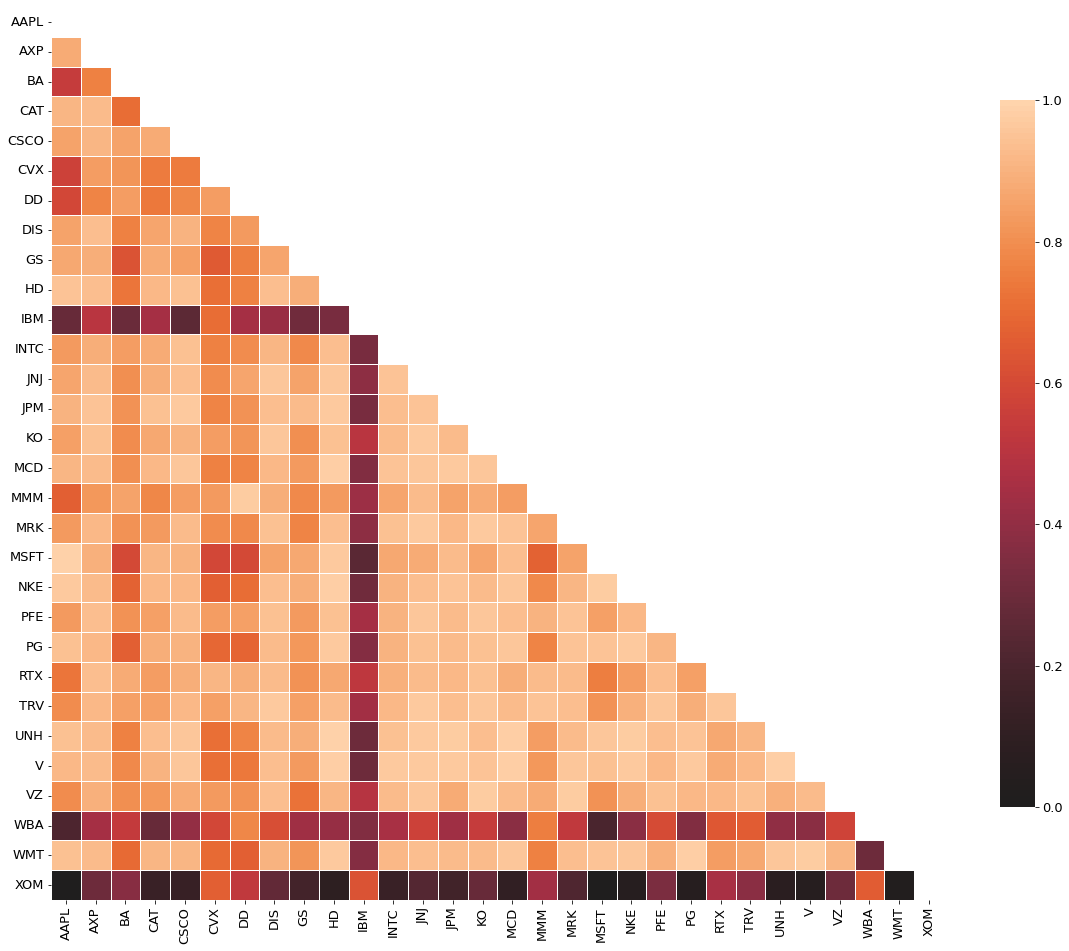

In [13]:
# Compute the correlation matrix
corr = df.corr()
# corr = df.sample(n=10, axis=1).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .65},
            # cmap=cmap, 
            )